EDA : Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in data analysis that involves exploring and summarizing key characteristics of a dataset. It helps analysts understand the data, discover patterns, spot anomalies, and formulate hypotheses for further investigation.

1. Understand the Data Structure: EDA helps to understand the dataset's dimensions (number of rows and columns), data types, and basic information about each variable.

2. Detect Anomalies: Identify missing values, outliers, or inconsistencies in the dataset that could affect analysis or modeling.

3. Explore Relationships: Investigate relationships and dependencies between variables to inform subsequent analysis or modeling decisions.

4. Test Assumptions: Validate assumptions about the data distribution, correlations, or other statistical properties.

5. Extract Insights: Use visual methods and statistical summaries to extract meaningful insights and patterns from the data.

Steps in Performing EDA:

1. Data Collection: Gather the dataset from various sources, such as databases, files, or APIs.

2. Data Cleaning: Handle missing values, remove duplicates, and standardize data formats to ensure data quality.

3. Exploratory Analysis: Explore each variable individually (univariate analysis) and relationships between variables (bivariate/multivariate analysis).

4. Visualization: Create visual representations of data using plots and charts to gain insights quickly and effectively.

5. Statistical Testing: Perform statistical tests (e.g., hypothesis testing, correlation analysis) to validate findings or test hypotheses.

6. Interpretation and Reporting: Summarize findings, draw conclusions, and present insights to stakeholders or decision-makers.

Techniques Used in EDA : 

EDA involves a variety of techniques and tools to achieve its goals:

1. Summary Statistics: Compute descriptive statistics such as mean, median, mode, variance, and standard deviation to summarize the central tendency and dispersion of data.

2. Data Visualization: Use plots and charts (e.g., histograms, box plots, scatter plots, heatmaps) to visually explore distributions, trends, and relationships within the dataset.

3. Correlation Analysis: Calculate correlation coefficients (e.g., Pearson, Spearman) to quantify the strength and direction of relationships between pairs of variables.

4. Dimensionality Reduction: Apply techniques like Principal Component Analysis (PCA) or t-SNE to reduce the number of variables while preserving essential information.

5. Feature Engineering: Create new features or transform existing features to enhance model performance or improve interpretability.

Automated EDA with Pandas-Profiling : Pandas-Profiling is a powerful library that provides an easy way to generate comprehensive reports on data analysis.These records includes descriptive statistics,correlation matrix and missing value analysis among other useful insights

In [1]:
# !pip install pandas_profiling
# load file
# from pandas_profiling import ProfileReport
# Profile=ProfileReport(data,explorative=True)
# Profile.to_file('outcome.html')

Automated EDA with Autoviz Library : It is a python library designed for automated visualization of datasets.It is perficularly useful for quickly generating a variety of visualization during EDA

In [2]:
# !pip install autoviz
# from autoviz.AutoViz_class import AutoViz_class
# %matplotlib inline()
# AV=AutoViz_class()
# filename=data
# dft=Av.AutoViz(
#     filename
# )

Automated EDA with Sweetviz library : Sweetviz is another python librry designed for automated EDA,similer to autoviz.It generates detailed and informative visualization and statistical summeries of your dataset with minimal code

In [3]:
# !pip install sweetviz
# load data 
# import sweetviz as sv
# report=sv.analyze(data)
# report.show_html()

Automated EDA with Dtale library : D-Tale is a powerful library in Python that provides a visual interface for exploring and analyzing Pandas DataFrames. It combines the capabilities of a DataFrame viewer and an analysis tool, allowing for an interactive and intuitive exploration of datasets. Here’s a guide on how to use D-Tale for automated exploratory data analysis (EDA)

In [4]:
# pip install dtale
# import dtale
# load dataset
# data=dtale.show(dataset)

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Readling the file :
csv file, json file,excel file , web scraping or from sns dataset
now we are using sns dataset

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
data.shape

(891, 15)

In [9]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
list(data.columns)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [11]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [12]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[float, int]).columns

# Identify categorical columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns

# Identify all columns
column = data.select_dtypes(include=[float, int, object, bool, 'category']).columns

# Print results
print("Numerical Columns:", numerical_cols)
print()
print("Categorical Columns:", categorical_cols)
print()
print("All Columns:", column)
print()
print("Data Types:\n", data.dtypes)

Numerical Columns: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Categorical Columns: Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

All Columns: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [13]:
data.dtypes[data.dtypes=='object'].index #to display only categorical column

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [14]:
data[data.dtypes[data.dtypes=='object'].index].describe()

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [15]:
data[data.dtypes[data.dtypes=='float64'].index].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [16]:
data[data.dtypes[data.dtypes=='int64'].index].describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


In [17]:
data.head() # displays1st 5 rows  

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
data.tail() # displays last 5 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
type(data) # pandas DataFrame

pandas.core.frame.DataFrame

In [21]:
data.describe() # describe the info column wise for only numerical data

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data['survived'].mean() # we can check column wise r only number of data

0.3838383838383838

In [23]:
data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [24]:
data[data['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [25]:
data[data['survived']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [26]:
data[data['sex']=='male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
data[data['sex']=='female']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [28]:
data['new_col']=0 # to create  new column
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_col
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [29]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

check null value:
1. droping null values
2. Filling with imputation
3. Fill NAN
4. KNN 
Depends on the percentage of data is required for model building 

In [30]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_col          0
dtype: int64

In [31]:
data.isnull().sum()/len(data)*100 # calculating percentage  of null data

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
new_col         0.000000
dtype: float64

now will replace null with imputation

In [32]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Impute categorical columns with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

In [33]:
# age=data['age'].mean()
# data['age']=data['age'].fillna(age)
# data

In [34]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
new_col        0
dtype: int64

In [35]:
# from sklearn.impute import KNNImputer

# # Impute using KNN
# imputer_knn = KNNImputer(n_neighbors=5)
# data = pd.DataFrame(imputer_knn.fit_transform(data), columns=data.columns)


In [36]:
# deck=data['deck'].mode()
# deck
# # data['deck']=data['deck'].fillna(deck)
# # data

In [37]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
new_col        0
dtype: int64

In [38]:
data.dropna(inplace=True)

checking duplicate rows and droppping that element

In [39]:
data[data.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_col
47,1.0,3.0,female,29.699118,0.0,0.0,7.7500,Q,Third,woman,False,C,Queenstown,yes,True,0
76,0.0,3.0,male,29.699118,0.0,0.0,7.8958,S,Third,man,True,C,Southampton,no,True,0
77,0.0,3.0,male,29.699118,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True,0
87,0.0,3.0,male,29.699118,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True,0
95,0.0,3.0,male,29.699118,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.0,3.0,male,26.000000,0.0,0.0,7.8958,S,Third,man,True,C,Southampton,no,True,0
877,0.0,3.0,male,19.000000,0.0,0.0,7.8958,S,Third,man,True,C,Southampton,no,True,0
878,0.0,3.0,male,29.699118,0.0,0.0,7.8958,S,Third,man,True,C,Southampton,no,True,0
884,0.0,3.0,male,25.000000,0.0,0.0,7.0500,S,Third,man,True,C,Southampton,no,True,0


In [40]:
data.duplicated().sum()

108

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data.duplicated().sum()

0

Dropping unknown column r not neccessary column

In [43]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'new_col'],
      dtype='object')

In [44]:
data.drop(['new_col'],axis=1,inplace=True)

In [45]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [46]:
data.iloc[2:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1.0,3.0,female,26.0,0.0,0.0,7.925,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.050,S,Third,man,True,C,Southampton,no,True


Correlation & Covariance

In [47]:
data.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.334817,-0.078331,-0.037180,0.069818,0.246716,-0.528068,-0.175829
pclass,-0.334817,1.000000,-0.337997,0.087161,0.039432,-0.550261,0.068538,0.111368
age,-0.078331,-0.337997,1.000000,-0.280119,-0.187165,0.090261,0.274537,0.194029
sibsp,-0.037180,0.087161,-0.280119,1.000000,0.381225,0.135067,-0.274117,-0.609317
parch,0.069818,0.039432,-0.187165,0.381225,1.000000,0.191876,-0.346859,-0.570901
fare,0.246716,-0.550261,0.090261,0.135067,0.191876,1.000000,-0.165117,-0.246568
adult_male,-0.528068,0.068538,0.274537,-0.274117,-0.346859,-0.165117,1.000000,0.387265
alone,-0.175829,0.111368,0.194029,-0.609317,-0.570901,-0.246568,0.387265,1.000000


In [48]:
data.cov(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,0.242656,-0.140925,-0.528026,-0.018071,0.028798,6.343116,-0.128686,-0.042928
pclass,-0.140925,0.730076,-3.952045,0.073483,0.028211,-24.539292,0.028971,0.047163
age,-0.528026,-3.952045,187.261659,-3.782203,-2.144584,64.466590,1.858526,1.315970
sibsp,-0.018071,0.073483,-3.782203,0.973546,0.314959,6.955649,-0.133801,-0.297972
parch,0.028798,0.028211,-2.144584,0.314959,0.701113,8.385427,-0.143678,-0.236924
fare,6.343116,-24.539292,64.466590,6.955649,8.385427,2724.075212,-4.263303,-6.378235
adult_male,-0.128686,0.028971,1.858526,-0.133801,-0.143678,-4.263303,0.244731,0.094953
alone,-0.042928,0.047163,1.315970,-0.297972,-0.236924,-6.378235,0.094953,0.245645


In [49]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,0.412516,2.245211,29.805270,0.523627,0.416347,34.722163
std,0.492602,0.854445,13.684358,0.986684,0.837325,52.192674
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization

<Axes: ylabel='count'>

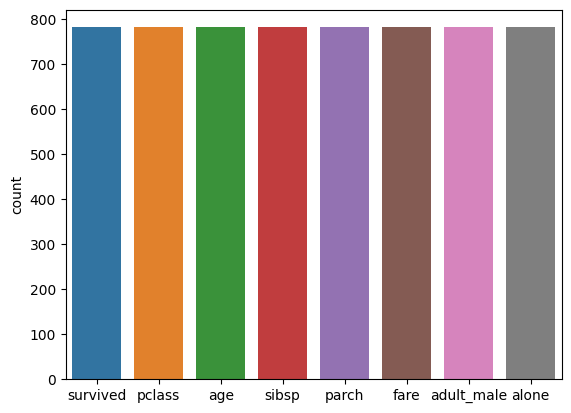

In [50]:
sns.countplot(data)

<Axes: xlabel='survived', ylabel='count'>

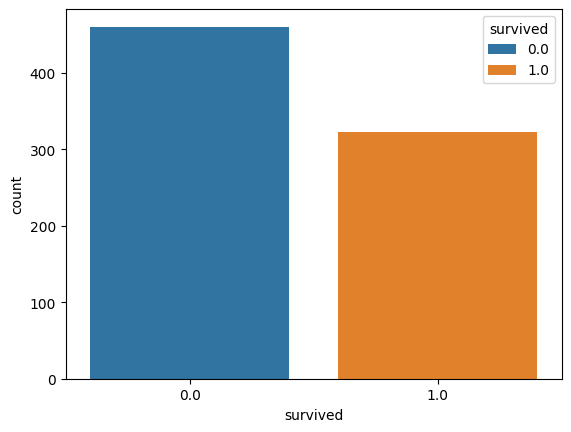

In [51]:
sns.countplot(x='survived',hue='survived',data=data)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

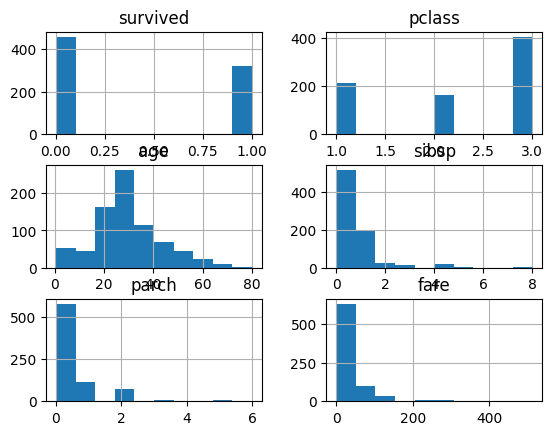

In [52]:
data.hist()

<Axes: xlabel='survived', ylabel='Density'>

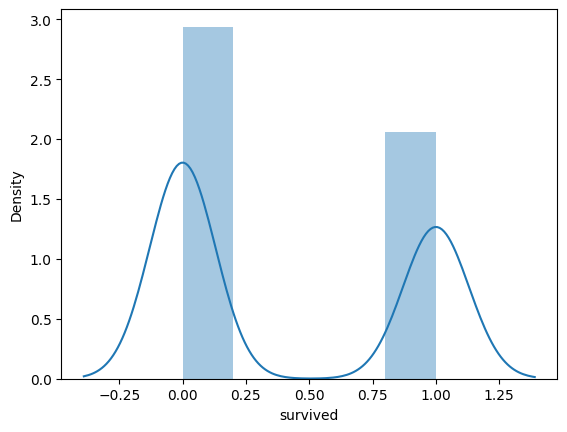

In [53]:
sns.distplot(data['survived'])

<Axes: >

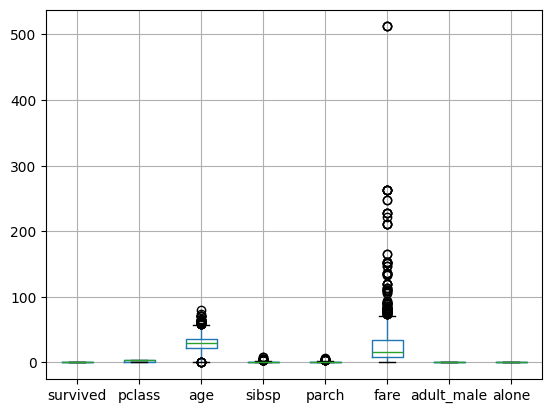

In [54]:
data.boxplot() # to check outliers

Removing outliers

In [55]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns

# Define a function to identify outliers
def detect_outliers_iqr(data):
    Q1 = data[num_cols].quantile(0.25)
    Q3 = data[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers
    

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

survived      0
pclass        0
age          38
sibsp        39
parch        15
fare        102
dtype: int64


In [56]:
data = data[~outliers.any(axis=1)]
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,2.0,male,28.000000,0.0,0.0,10.5000,S,Second,man,True,C,Southampton,no,True
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,29.699118,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns
# Detect outliers using IQR method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

# # Remove outliers from the dataframe
# 

survived      0
pclass        0
age          27
sibsp         0
parch       110
fare         27
dtype: int64


<Axes: >

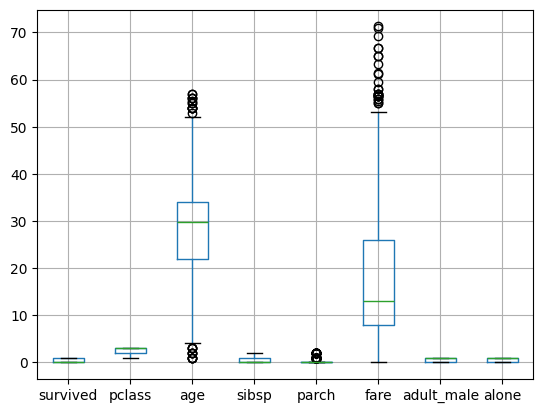

In [58]:
data.boxplot()

In [59]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns
# Detect outliers using IQR method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

# # Remove outliers from the dataframe
# 

survived      0
pclass        0
age          27
sibsp         0
parch       110
fare         27
dtype: int64


<Axes: >

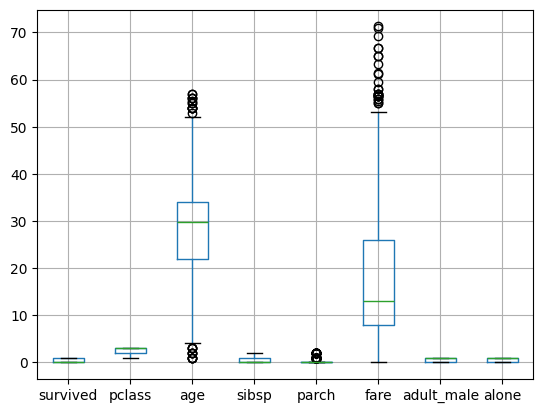

In [60]:
data.boxplot()

Automated EDA

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (602, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
survived,float64,0.000000,0,0.000000,1.000000,No issue
pclass,float64,0.000000,NA,1.000000,3.000000,No issue
sex,object,0.000000,0,,,No issue
age,float64,0.000000,NA,1.000000,57.000000,Column has 27 outliers greater than upper bound (52.00) or lower than lower bound(4.00). Cap them or remove them.
sibsp,float64,0.000000,NA,0.000000,2.000000,No issue
parch,float64,0.000000,NA,0.000000,2.000000,Column has 110 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
fare,float64,0.000000,NA,0.000000,71.283300,Column has 27 outliers greater than upper bound (53.16) or lower than lower bound(-19.26). Cap them or remove them.
embarked,object,0.000000,0,,,No issue
class,object,0.000000,0,,,No issue
who,object,0.000000,0,,,No issue


Number of All Scatter Plots = 15


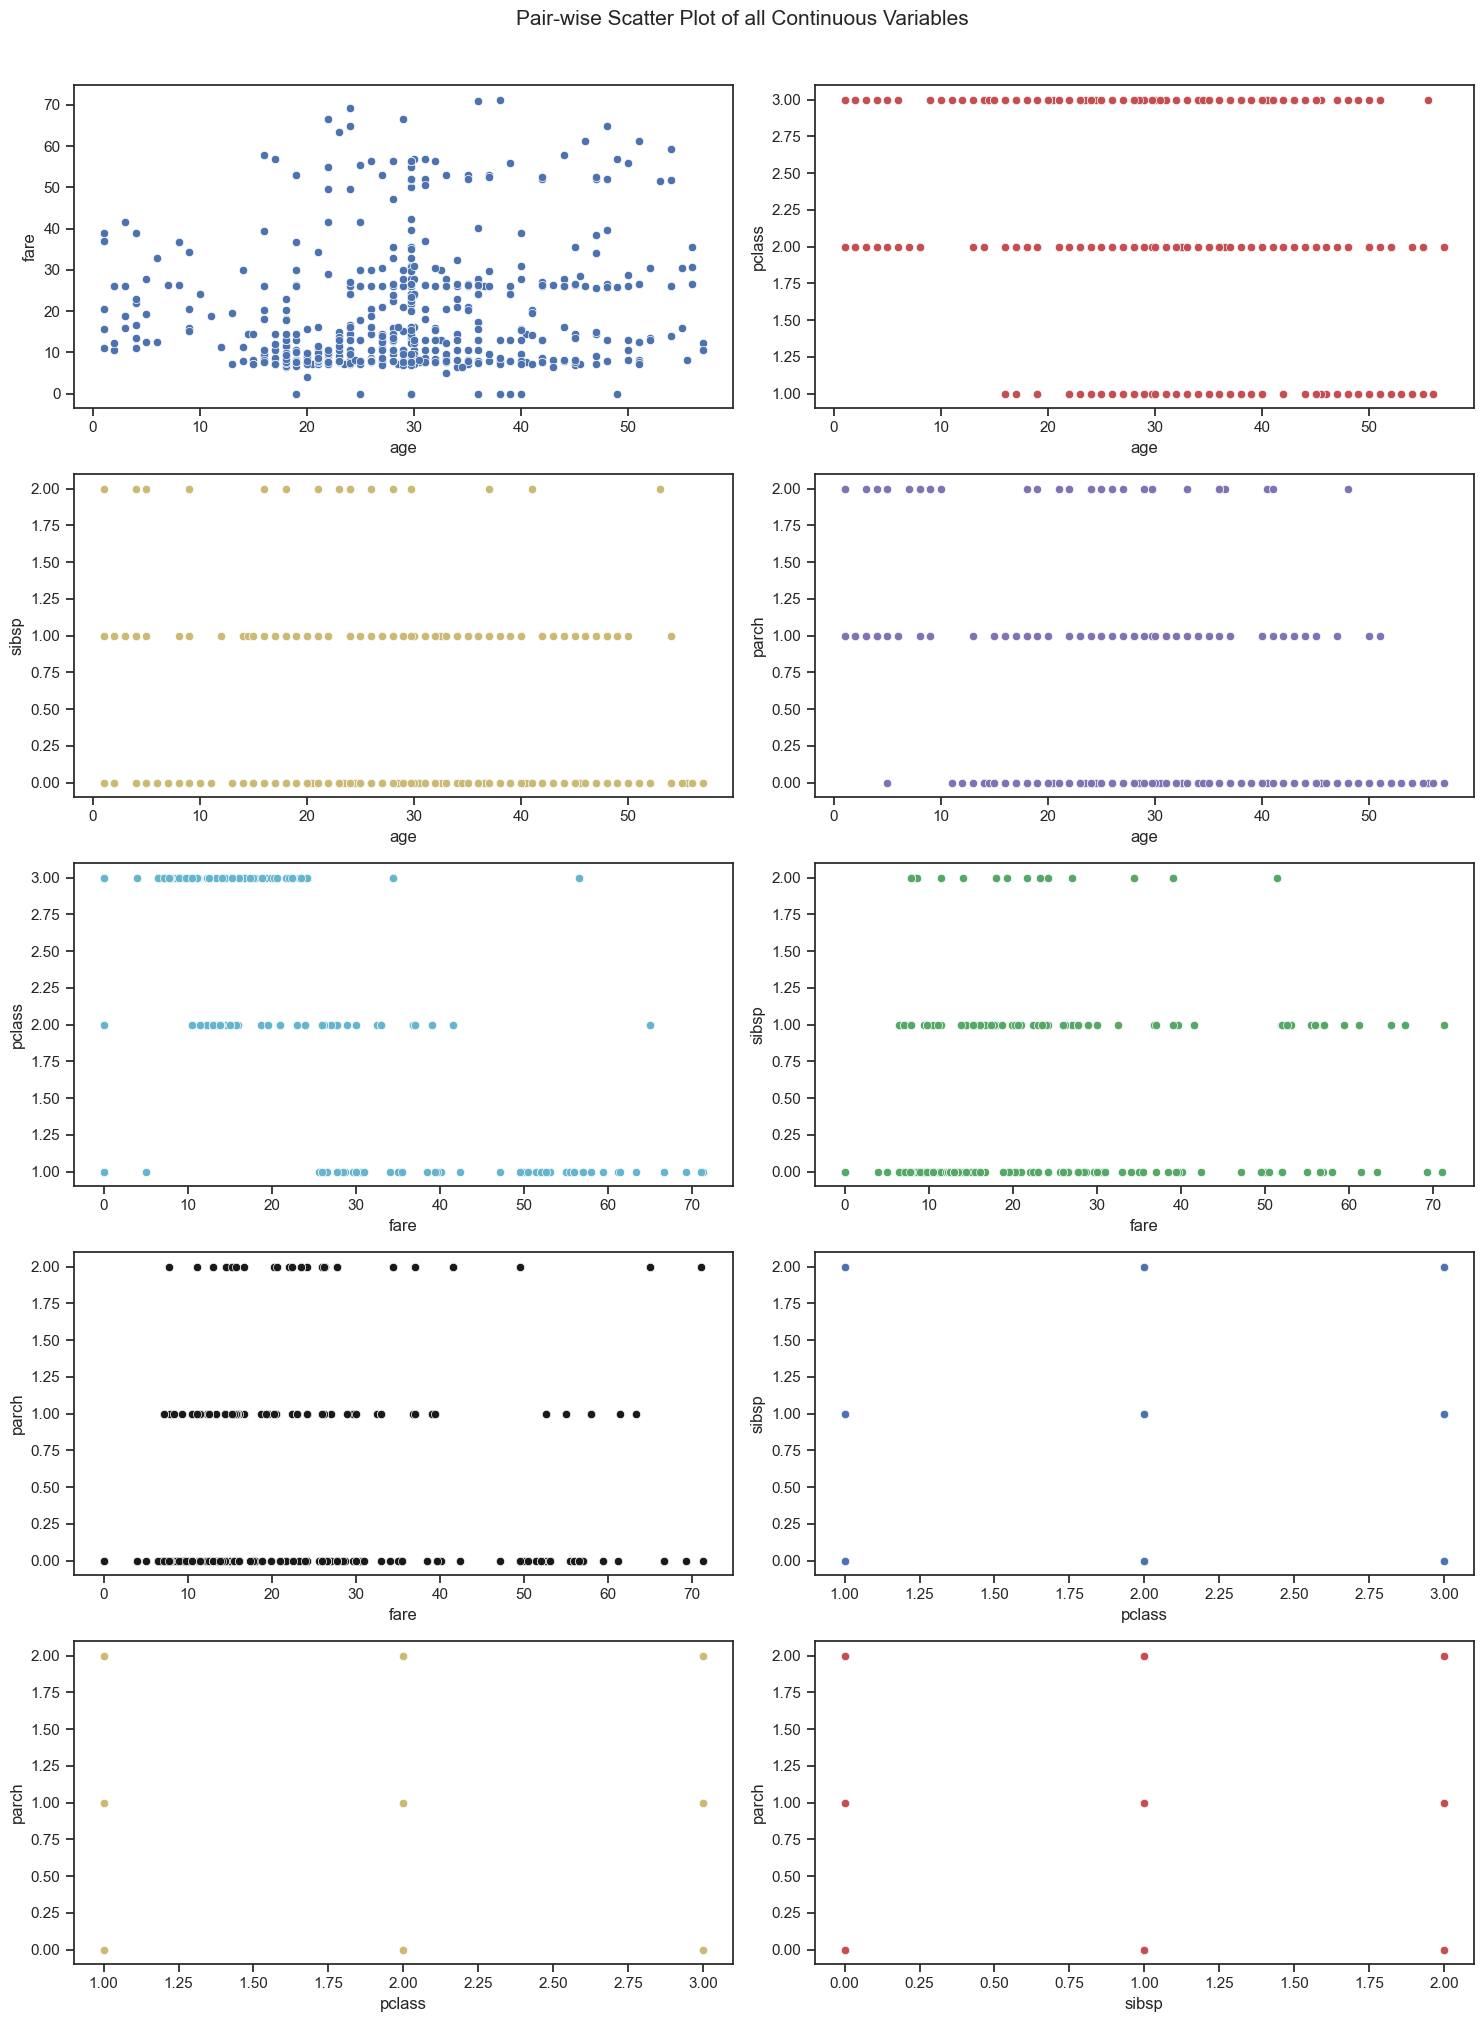

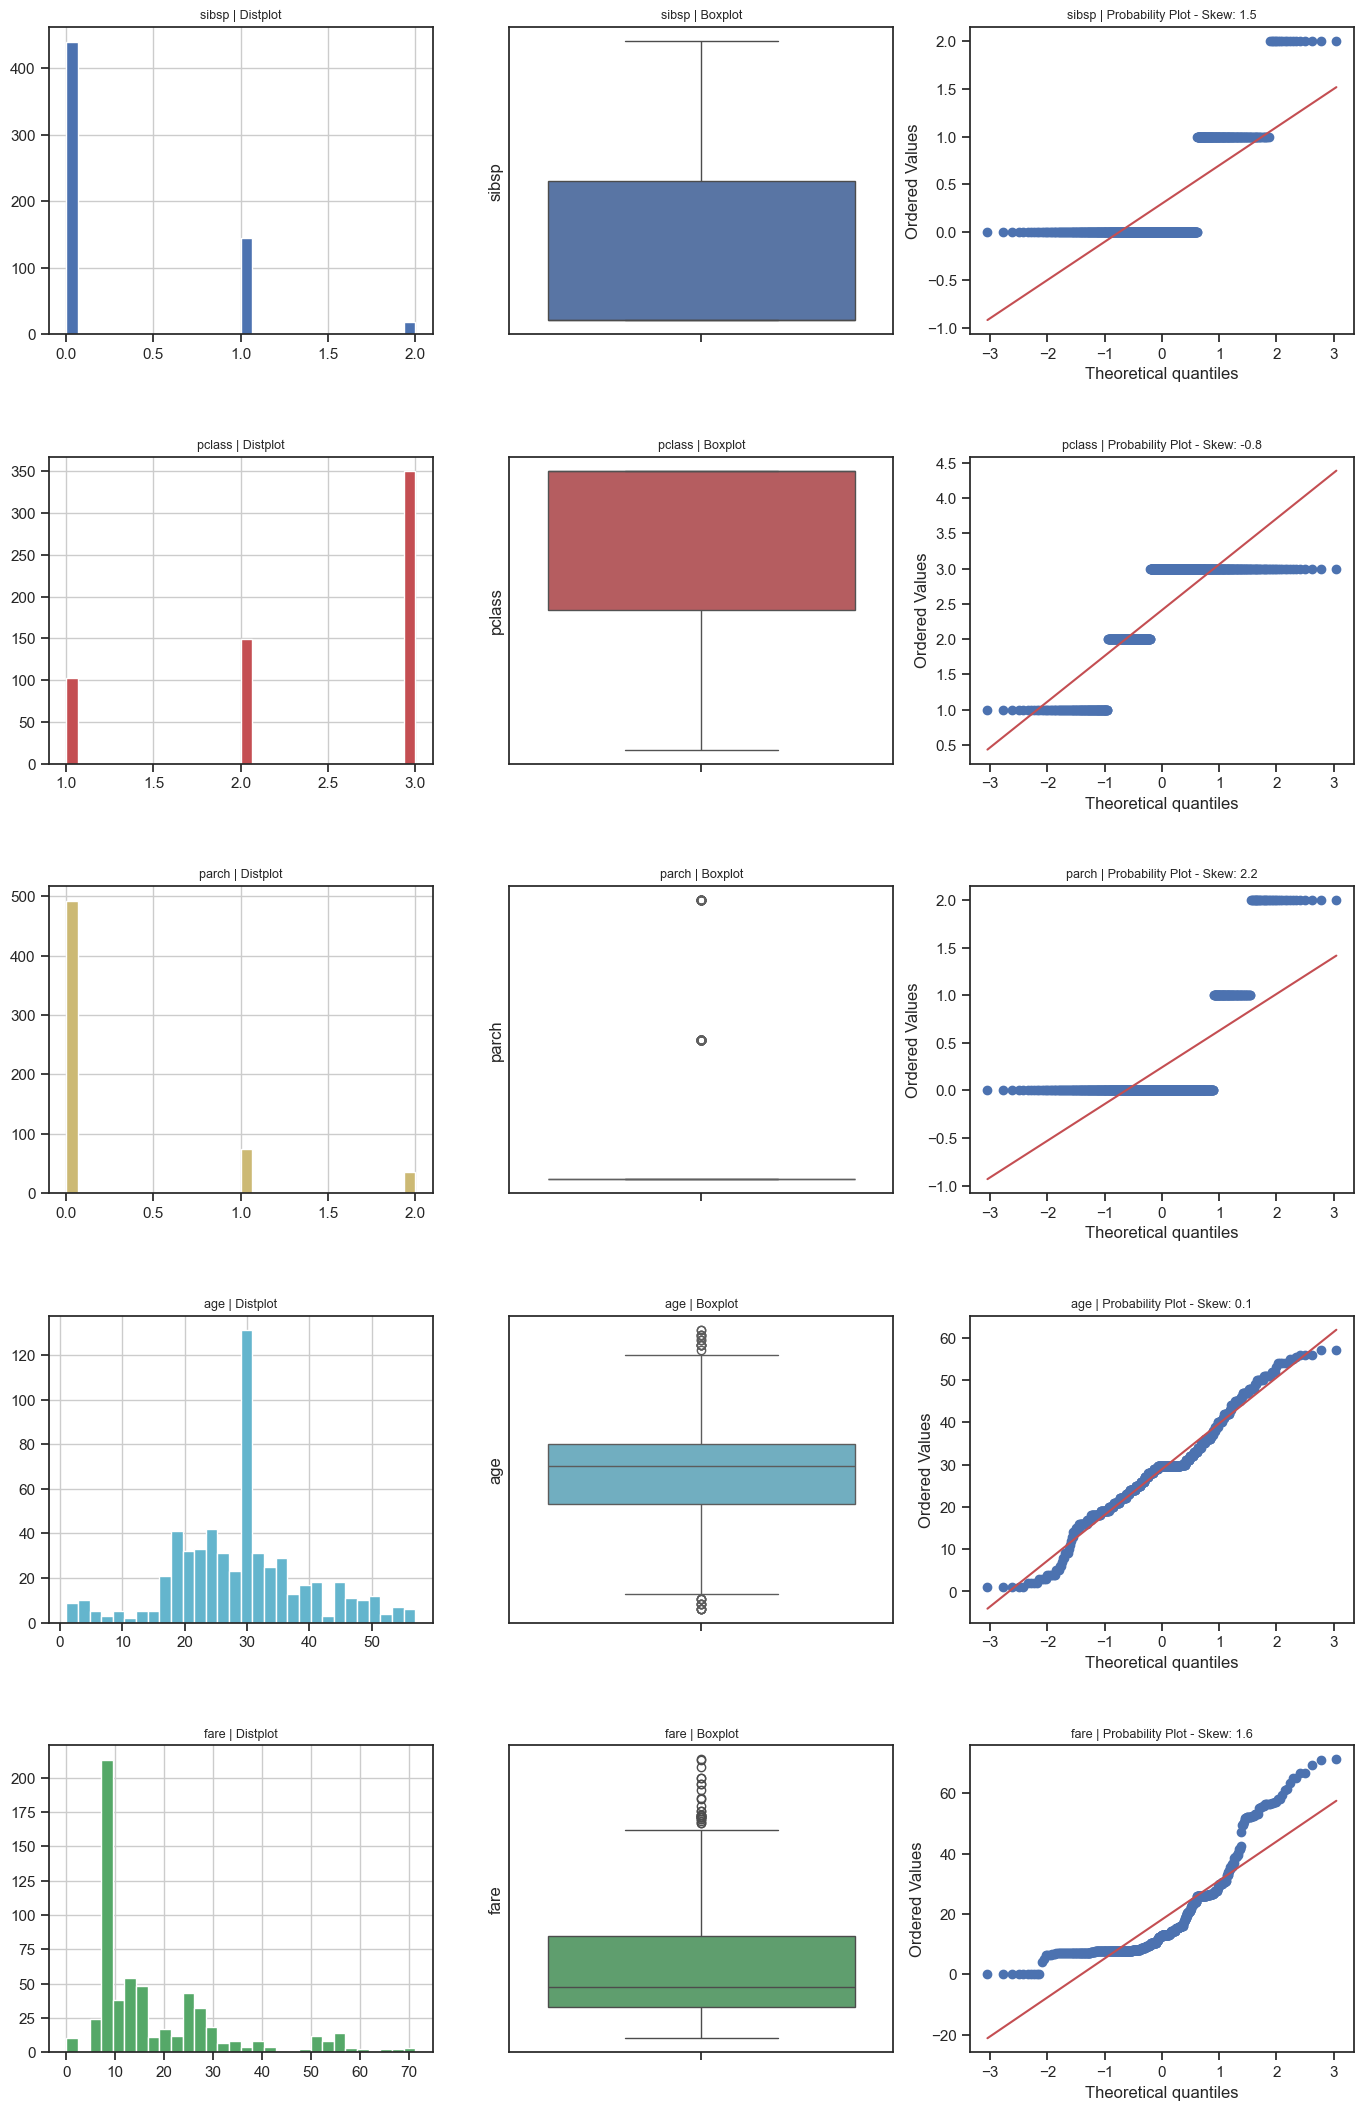

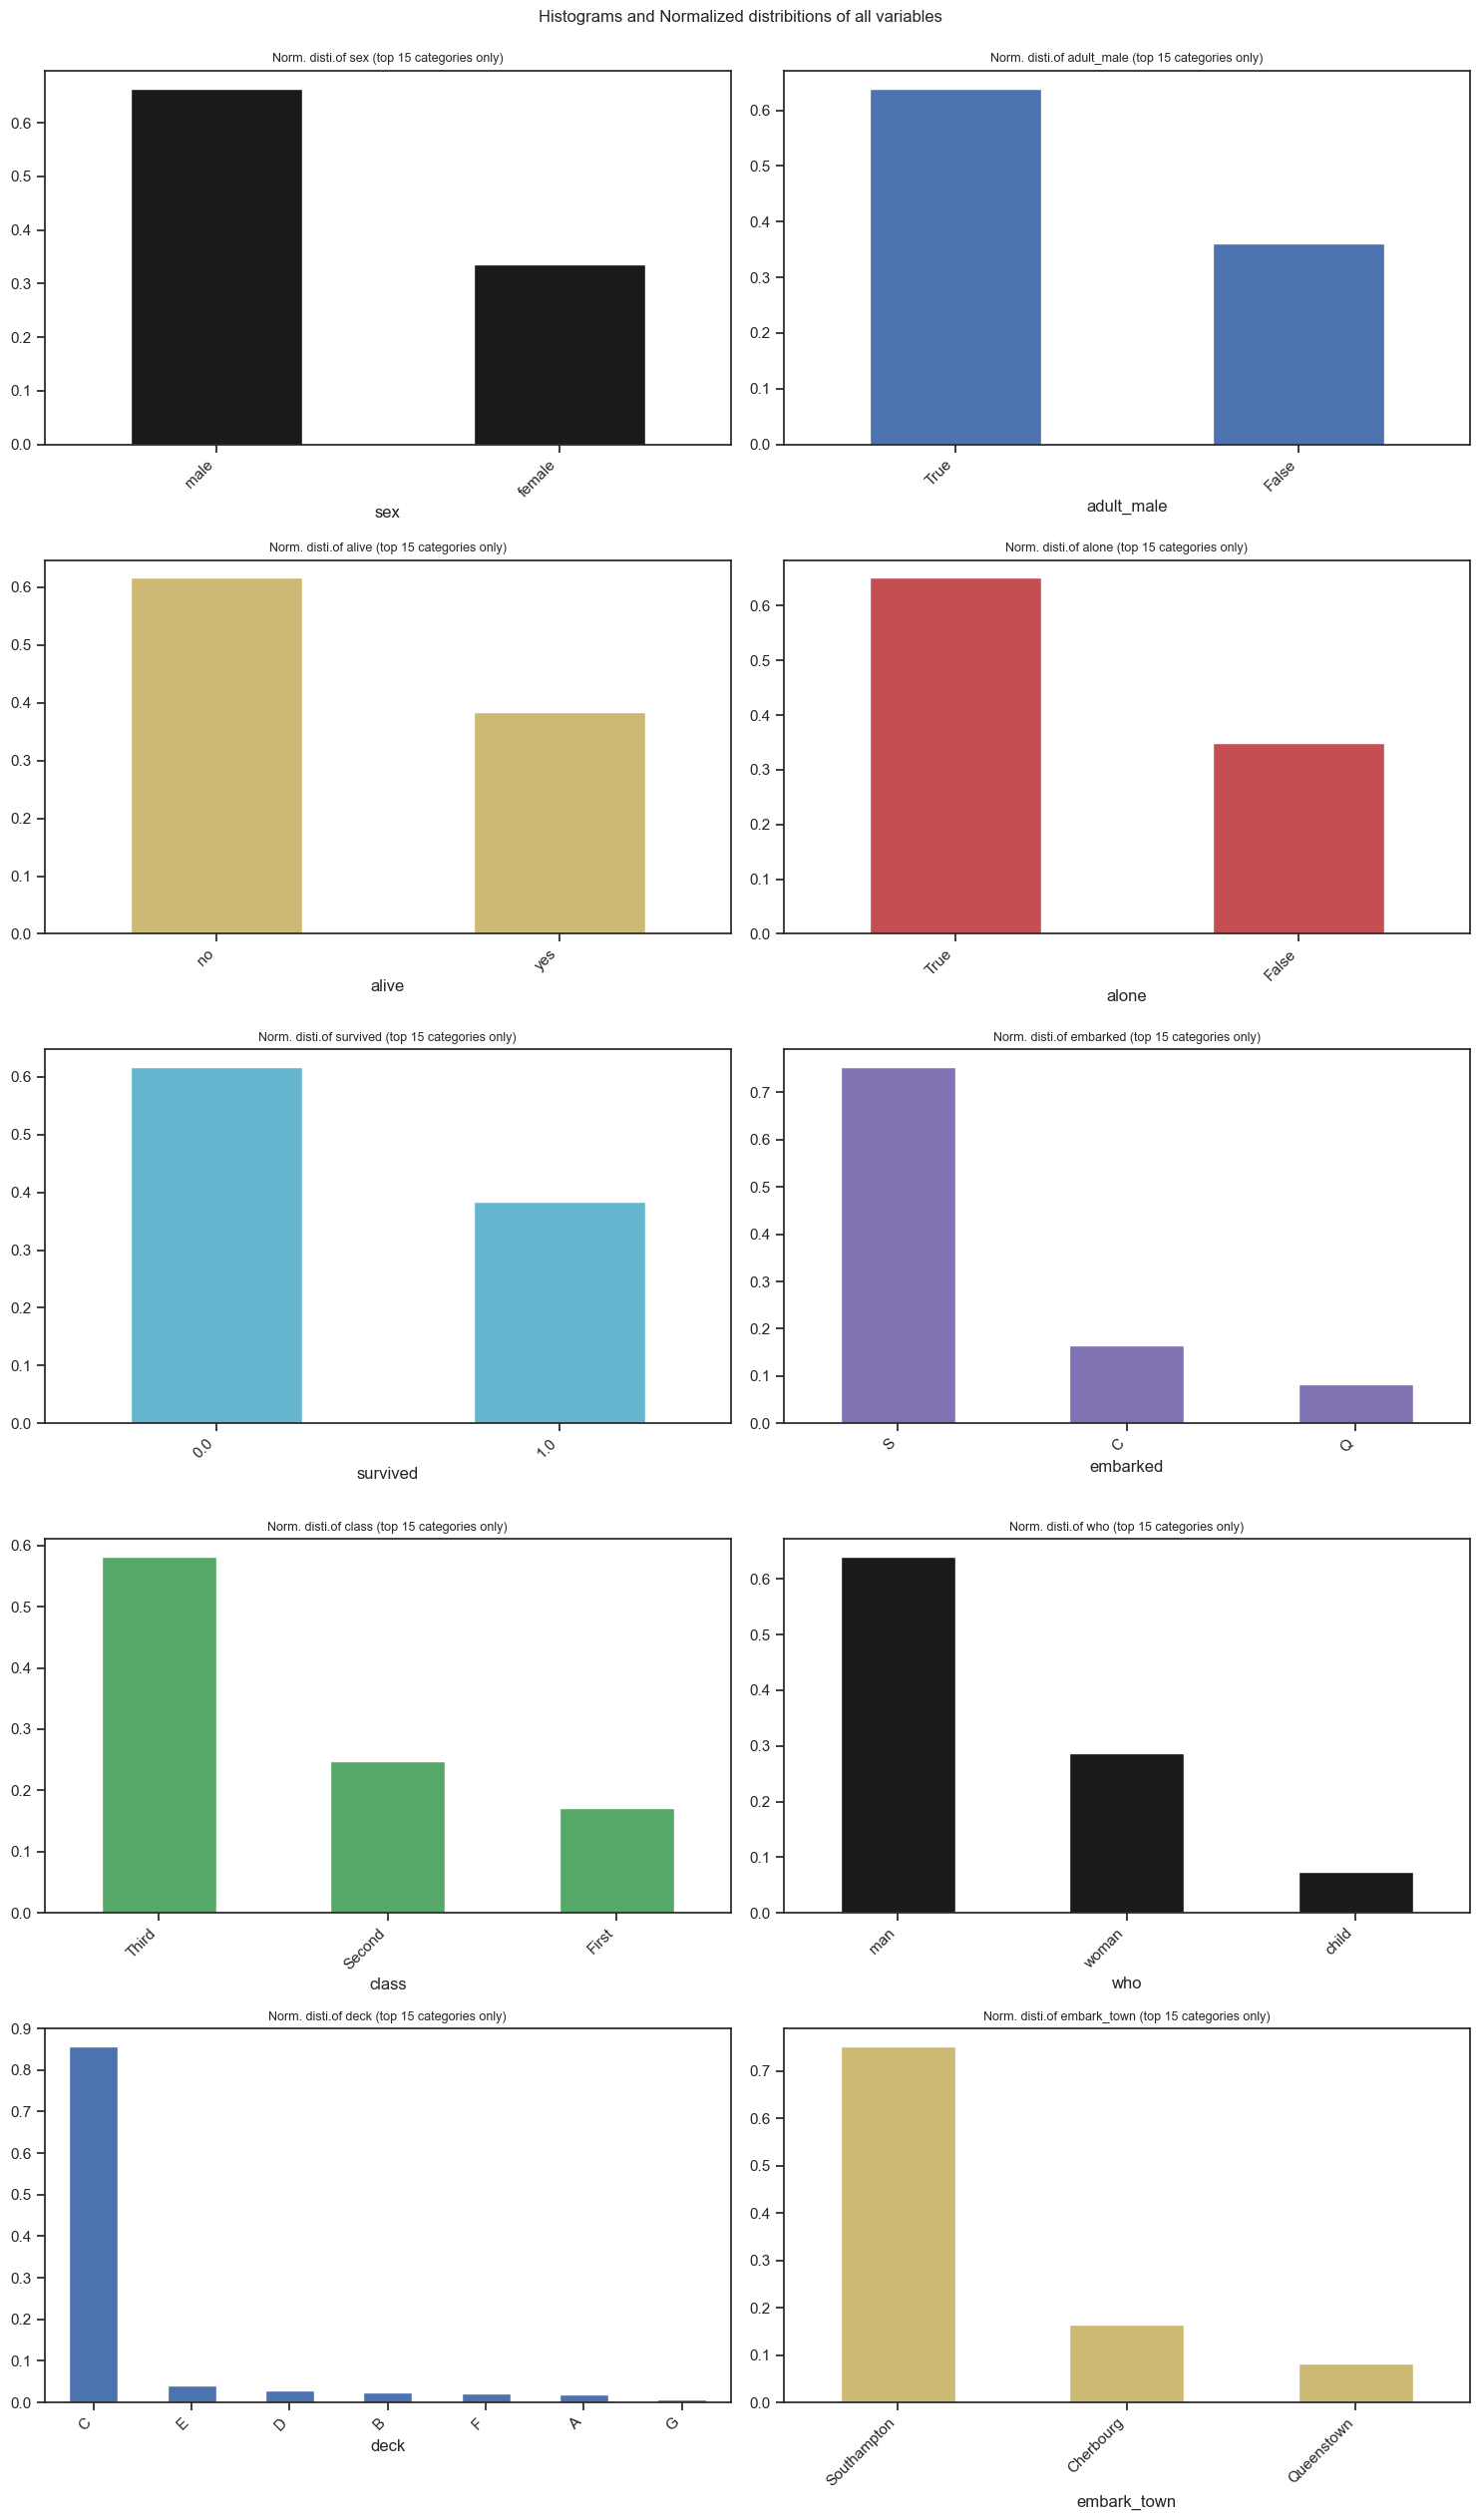

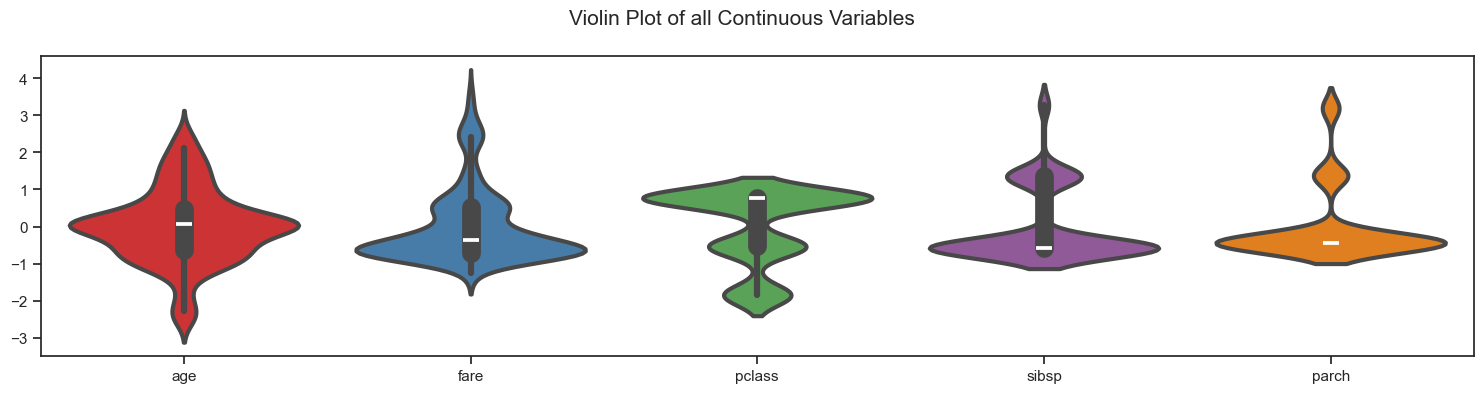

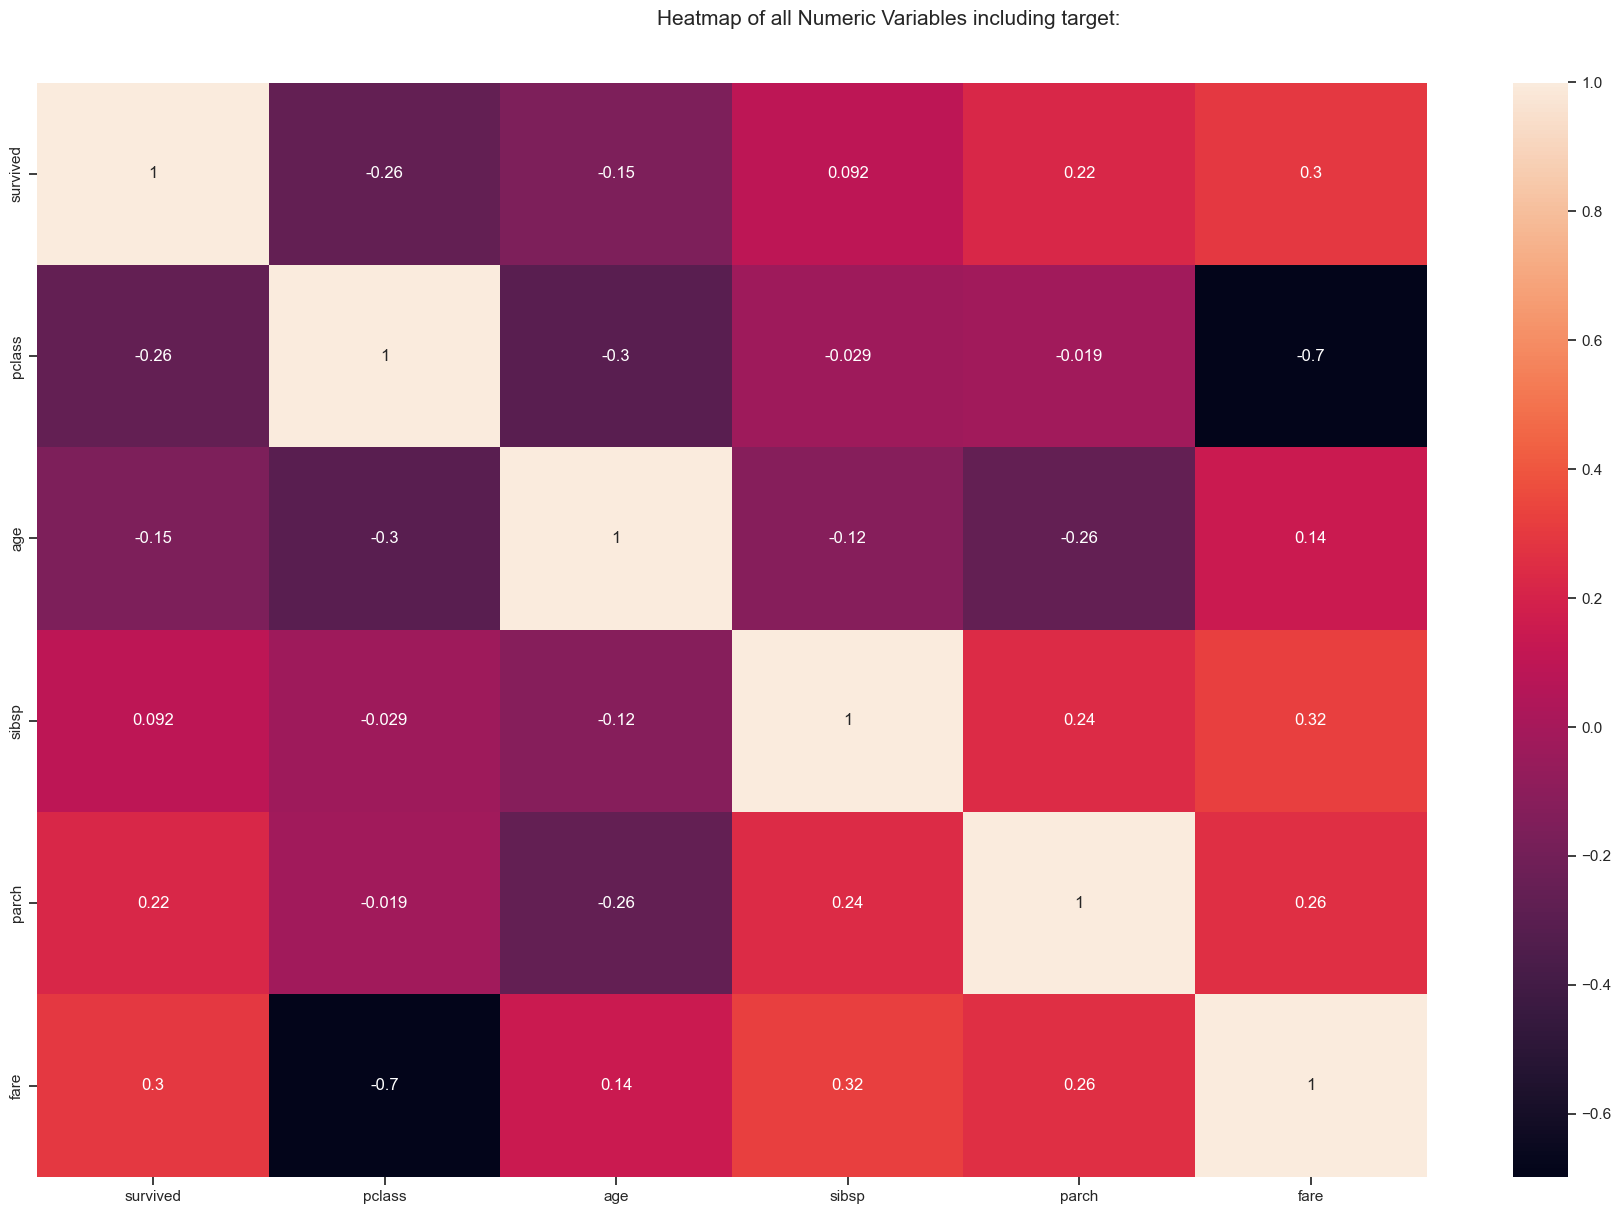

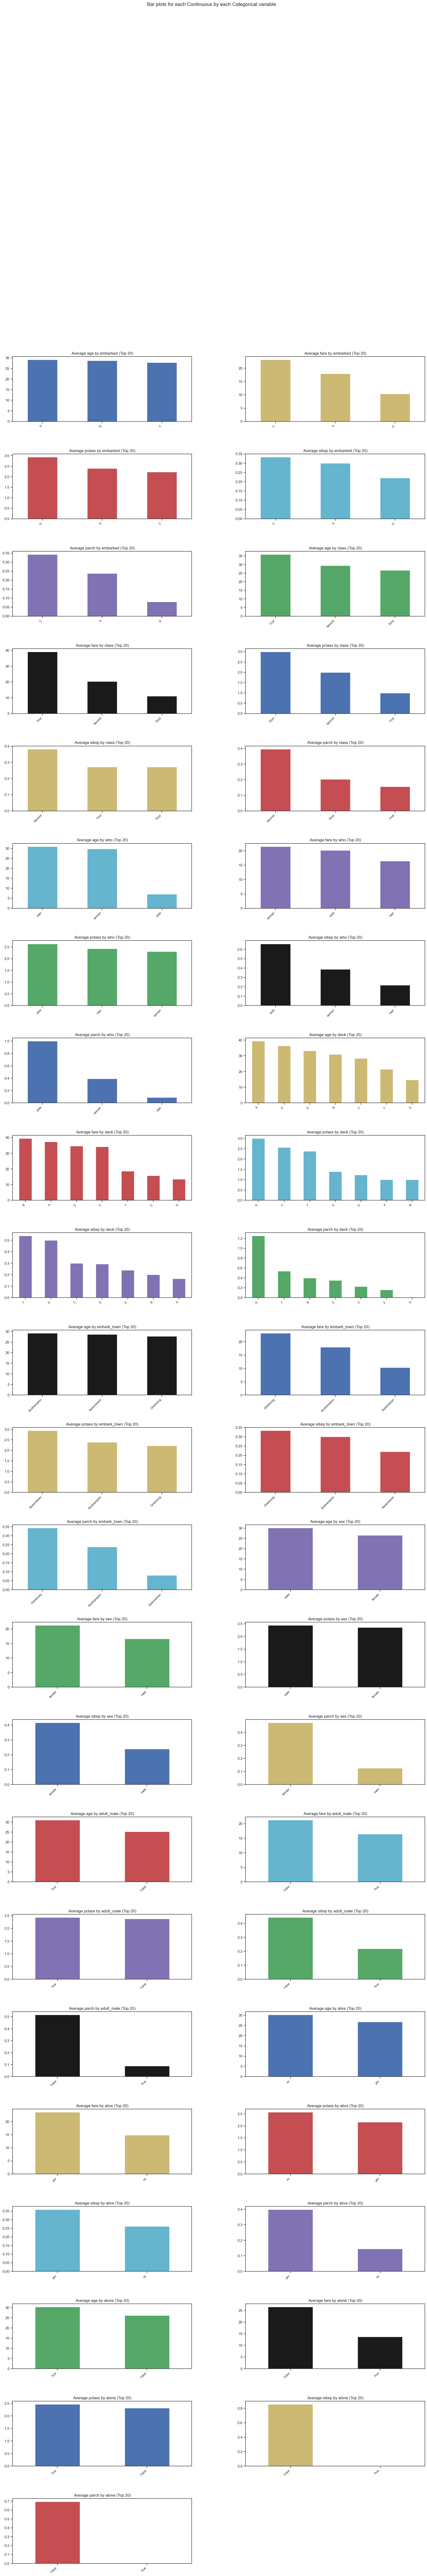

All Plots done
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [61]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename=data
dft=AV.AutoViz(
    filename
)

<Axes: >

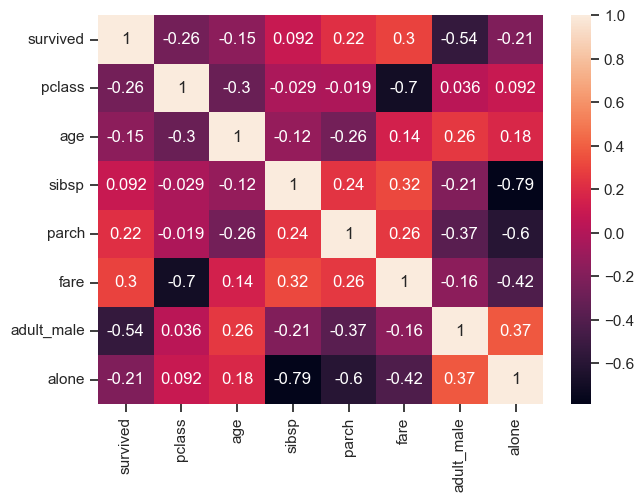

In [62]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

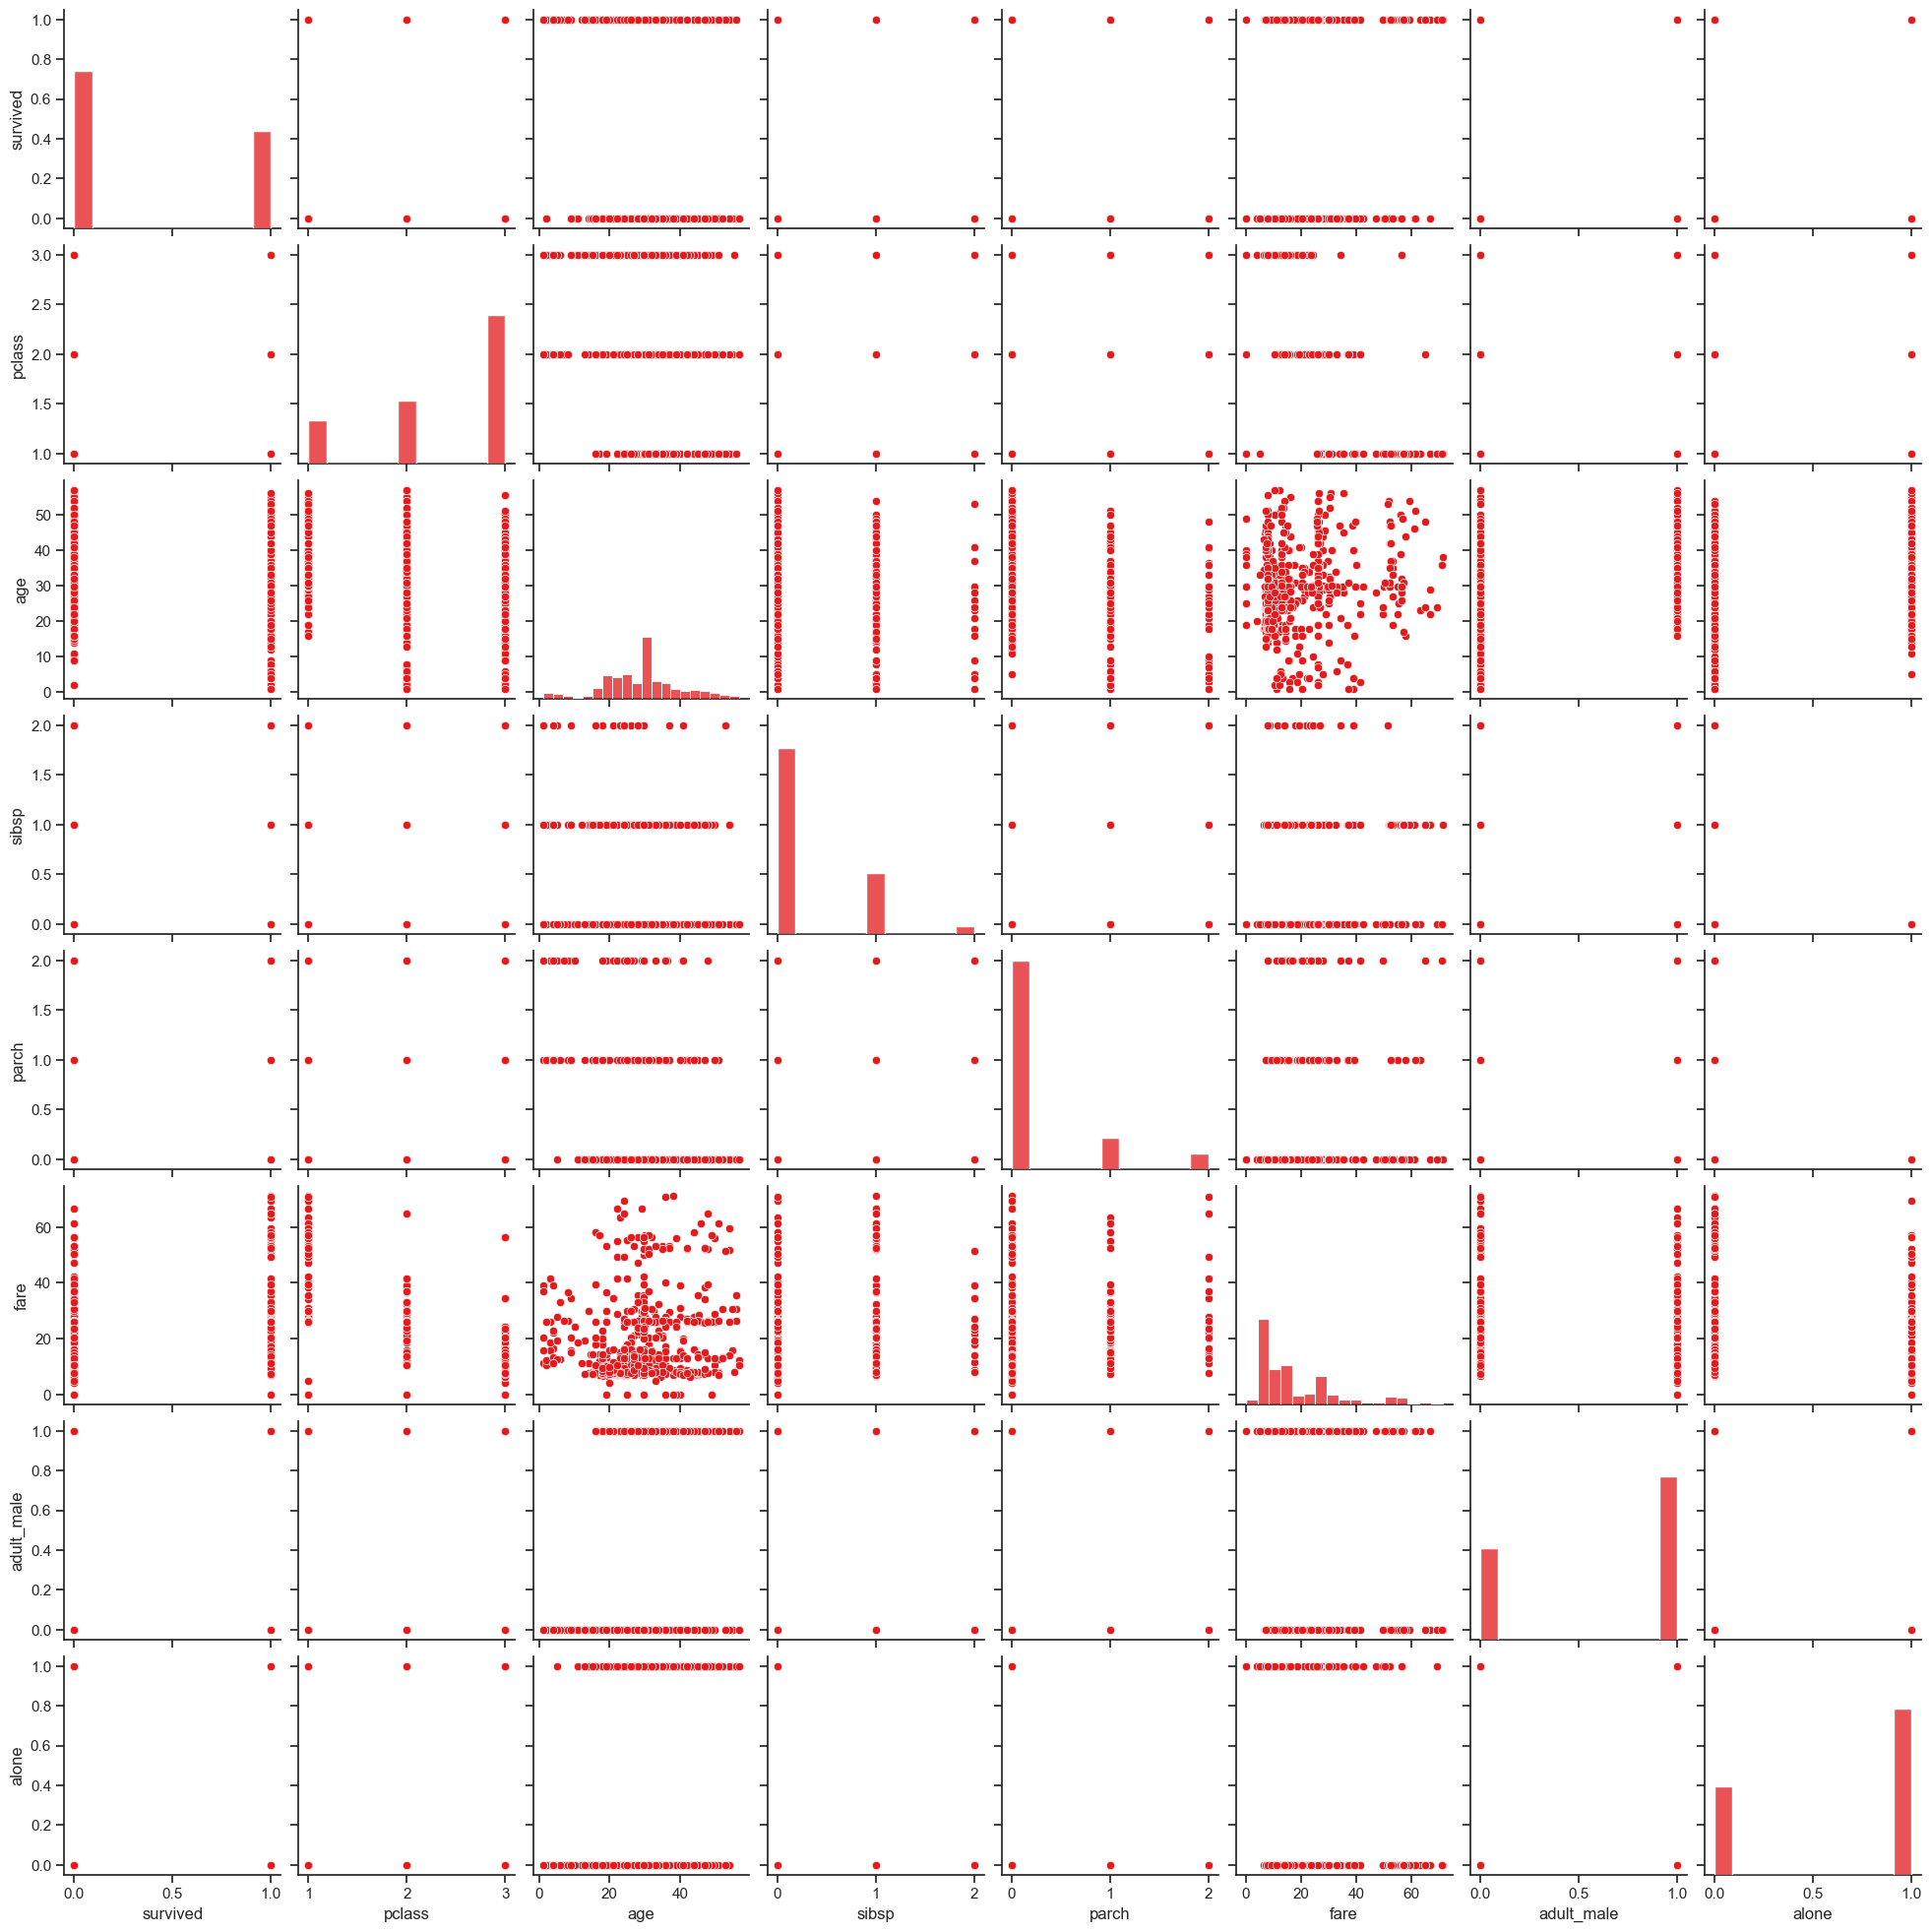

In [63]:
sns.pairplot(data)

In [64]:
# !pip install sweetviz
# load data 
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Encoding : Categorical to numerical

In [65]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object','category','bool']).columns:
    data[column]=label.fit_transform(data[column])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,1,22.000000,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1.0,1.0,0,38.000000,1.0,0.0,71.2833,0,0,2,0,2,0,1,0
2,1.0,3.0,0,26.000000,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1.0,1.0,0,35.000000,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,0.0,3.0,1,35.000000,0.0,0.0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,2.0,1,28.000000,0.0,0.0,10.5000,2,1,1,1,2,2,0,1
887,1.0,1.0,0,19.000000,0.0,0.0,30.0000,2,0,2,0,1,2,1,1
888,0.0,3.0,0,29.699118,1.0,2.0,23.4500,2,2,2,0,2,2,0,0
889,1.0,1.0,1,26.000000,0.0,0.0,30.0000,0,0,1,1,2,0,1,1


In [66]:
data.dtypes

survived       float64
pclass         float64
sex              int32
age            float64
sibsp          float64
parch          float64
fare           float64
embarked         int32
class            int32
who              int32
adult_male       int64
deck             int32
embark_town      int32
alive            int32
alone            int64
dtype: object

Feature Engineering 

Feature Encoding : Converting categorical to numerical
1. One-Hot-Encoding : Creating binary columns for each category(0,1). # get dummies # imputer
2. Label Encoding : Assigning a unique integer to each category # LabelEncoder
3. Ordinal Encoding :  Assigning integers to categories with a natural order. (Education level)

In [67]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()
# encoded=encoder.fit_transform(data).toarray()
# encoded

In [68]:
# data=pd.get_dummies(data)
# data

In [69]:
# converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for column in data.select_dtypes(include=['category','bool','object',]).columns:
    data[column] = label_encoders[column].fit_transform(data[column])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,1,22.000000,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1.0,1.0,0,38.000000,1.0,0.0,71.2833,0,0,2,0,2,0,1,0
2,1.0,3.0,0,26.000000,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1.0,1.0,0,35.000000,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,0.0,3.0,1,35.000000,0.0,0.0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,2.0,1,28.000000,0.0,0.0,10.5000,2,1,1,1,2,2,0,1
887,1.0,1.0,0,19.000000,0.0,0.0,30.0000,2,0,2,0,1,2,1,1
888,0.0,3.0,0,29.699118,1.0,2.0,23.4500,2,2,2,0,2,2,0,0
889,1.0,1.0,1,26.000000,0.0,0.0,30.0000,0,0,1,1,2,0,1,1


In [70]:
df_copy = data.copy() # copying data file 
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,1,22.000000,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1.0,1.0,0,38.000000,1.0,0.0,71.2833,0,0,2,0,2,0,1,0
2,1.0,3.0,0,26.000000,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1.0,1.0,0,35.000000,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,0.0,3.0,1,35.000000,0.0,0.0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,2.0,1,28.000000,0.0,0.0,10.5000,2,1,1,1,2,2,0,1
887,1.0,1.0,0,19.000000,0.0,0.0,30.0000,2,0,2,0,1,2,1,1
888,0.0,3.0,0,29.699118,1.0,2.0,23.4500,2,2,2,0,2,2,0,0
889,1.0,1.0,1,26.000000,0.0,0.0,30.0000,0,0,1,1,2,0,1,1


Standardization : Scaling data from different number range to common range 

In [72]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the entire DataFrame
data_scaled = scaler.fit_transform(data)

# Convert the result back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Print the scaled DataFrame
print(data_scaled)

     survived   pclass      sex       age      sibsp     parch     fare    \
0   -0.789076  0.771562  0.710634 -0.633995  1.350568 -0.440367 -0.757991   
1    1.267304 -1.845229 -1.407195  0.833166  1.350568 -0.440367  3.674561   
2    1.267304  0.771562 -1.407195 -0.267205 -0.576072 -0.440367 -0.711266   
3    1.267304 -1.845229 -1.407195  0.558073  1.350568 -0.440367  2.415865   
4   -0.789076  0.771562  0.710634  0.558073 -0.576072 -0.440367 -0.702613   
..        ...       ...       ...       ...       ...       ...       ...   
597 -0.789076 -0.536833  0.710634 -0.083810 -0.576072 -0.440367 -0.533018   
598  1.267304 -1.845229 -1.407195 -0.909088 -0.576072 -0.440367  0.816823   
599 -0.789076  0.771562 -1.407195  0.071995  1.350568  3.191151  0.363415   
600  1.267304 -1.845229  0.710634 -0.267205 -0.576072 -0.440367  0.816823   
601 -0.789076  0.771562  0.710634  0.282980 -0.576072 -0.440367 -0.723380   

     embarked    class      who    adult_male    deck    embark_town  \
0  

In [ ]:
# normalization
# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# data_normalized = scaler.fit_transform(data)

# # Convert to DataFrame
# data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

# # Print the normalized DataFrame
# print(data_normalized_df)

Split the data dependent and independent variable

In [73]:
x=data.drop(['survived'],axis=1) # Independent Variable
y=data['survived'] # Dependent Variable 

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((481, 14), (121, 14), (481,), (121,))

Feature Extraction :

PCA : Dimensionality reduction

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [77]:
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

In [78]:
x_train.shape,x_test.shape

((481, 5), (121, 5))

Model Building 